In [19]:
#==============================================================================
# # Run the SMART pipeline between conditions (within subject)
#==============================================================================

#==============================================================================
# Assumes that the data is in a pickle file and structured identical to 
# 'ExampleDataSMART.p'.
# 
# A pandas dataframe with:
#       Each participant in its own row 
#       Time var1 in 1 column, all the data in 1 cell
#       Dep. var1 in 1 column, all the data in 1 cell
#       Time var2 in 1 column, all the data in 1 cell # if testing between conditions
#       Dep. var2 in 1 column, all the data in 1 cell # if testing between conditions
#
# Example:
#       Index/pp	            TimeVar1	                    DepVar1	                     TimeVar2                      DepVar2
#           0	    [155 192 279 ..., 143 142 149]	    [0 0 1 ..., 0 1 0]	    [159 163 201 ..., 149 229 154]	    [0 1 0 ..., 1 0 1]
#           1	    [379 312 272 ..., 278 288 267]	    [1 1 1 ..., 0 1 1]	    [386 437 422 ..., 226 319 237]	    [1 1 1 ..., 1 1 0]
#           2	    [192 208 236 ..., 175 268 171]	    [0 0 0 ..., 0 0 0]	    [180 227 189 ..., 172 180 205]	    [1 1 1 ..., 1 1 1]
#           3	    [397 291 412 ..., 457 408 366]	    [1 1 1 ..., 1 1 1]	    [392 452 459 ..., 378 342 444]	    [1 1 0 ..., 1 1 1]

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem, t

t = time.time()

from SMARTClass import SMART

# Settings
fName = '/Users/camillaucheomaenwereuzor/Desktop/Coding/eye-search-analysis/SMART/allfiltered.p'
depVar1 = 'tgt_first_ns_pre'
timeVar1 ='sacc_lat_ns_pre'
depVar2 = 'tgt_first_s_pre'
timeVar2 = 'sacc_lat_s_pre'
depVar3 = 'tgt_first_ns_post'
timeVar3 = 'sacc_lat_ns_post'
depVar4 = 'tgt_first_s_post'
timeVar4 = 'sacc_lat_s_post'


krnSize = 10
minTime = 80 # TODO what do i choose here? 80 is min allowed sacc latency, or should it be 0?
maxTime = 500
stepTime = 1
nPerm = 1
baseline = 0.5
sigLevel = 0.05

Significant cluster from 80 to 80 ms, p < 0.050, tcluster (23) = 2.08, dcluster = 0.42
Significant cluster from 93 to 233 ms, p < 0.050, tcluster (23) = 1434.95, dcluster = 292.91
Significant cluster from 316 to 347 ms, p < 0.050, tcluster (23) = 104.43, dcluster = 21.32


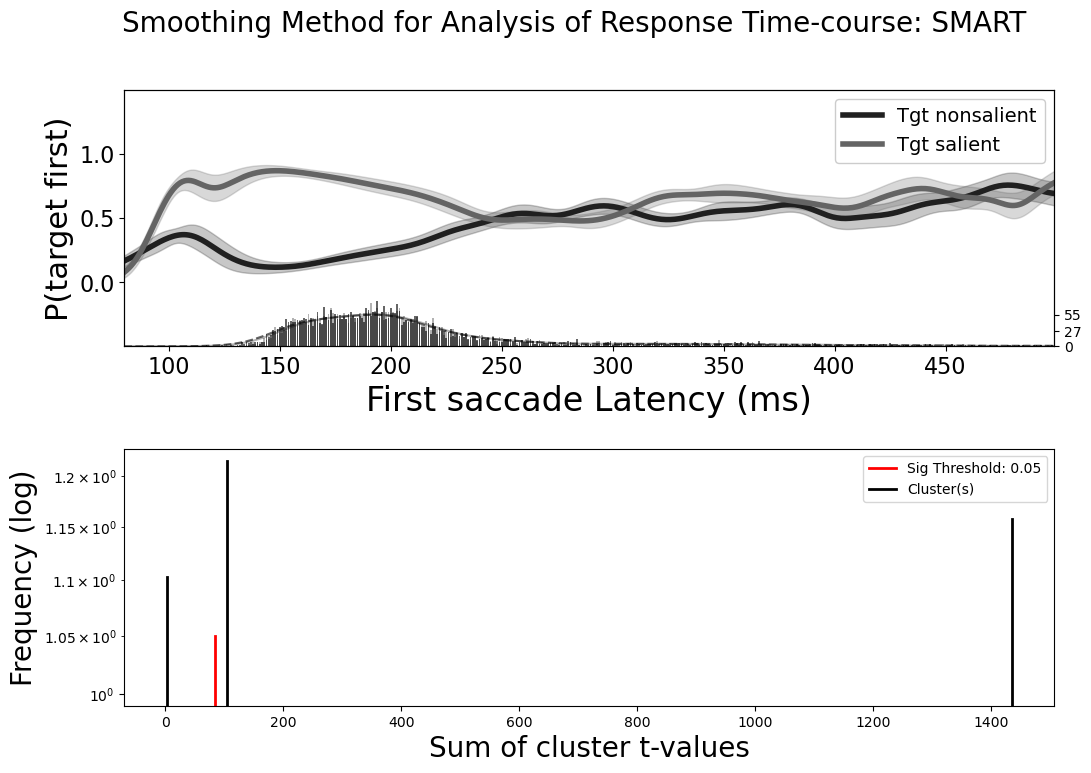

In [20]:
# ==============================================================================
# # Salience effect pre interruption (tgt_first_ns_pre vs tgt_first_s_pre) - Blue - Red
# ==============================================================================

# Initialize and run SMART analysis
pairedSamp1 = SMART(fName, depVar1, timeVar1, depVar2, timeVar2)
pairedSamp1.runSmooth(krnSize, minTime, maxTime, stepTime)
pairedSamp1.runPermutations(nPerm)
pairedSamp1.runStats(sigLevel)

# Original plot for pairedSamp1
pairedSamp1.runPlot()
cf = plt.gcf()
cf.set_size_inches(12, 8)  # Increase figure size for clarity
pairedSamp1.ax1.legend(['Tgt nonsalient','Tgt salient'], prop={"size": 14}, loc=1, framealpha=1, fancybox=True)
pairedSamp1.ax1.set_xlabel('First saccade Latency (ms)', fontsize=24)
pairedSamp1.ax1.set_ylabel('P(target first)', size=22)

# Adjust tick font sizes for x and y axes
pairedSamp1.ax1.tick_params(axis='x', labelsize=16)  # Adjust x-axis tick font size
pairedSamp1.ax1.tick_params(axis='y', labelsize=16)  # Adjust y-axis tick font size
# pairedSamp1.ax1.set_ylim([-0.31, 1.51])
pairedSamp1.ax1.set_yticks([0, 0.5, 1.0]) # Set y-axis ticks to 0, 0.5, 1.0

plt.subplots_adjust(hspace=0.4)

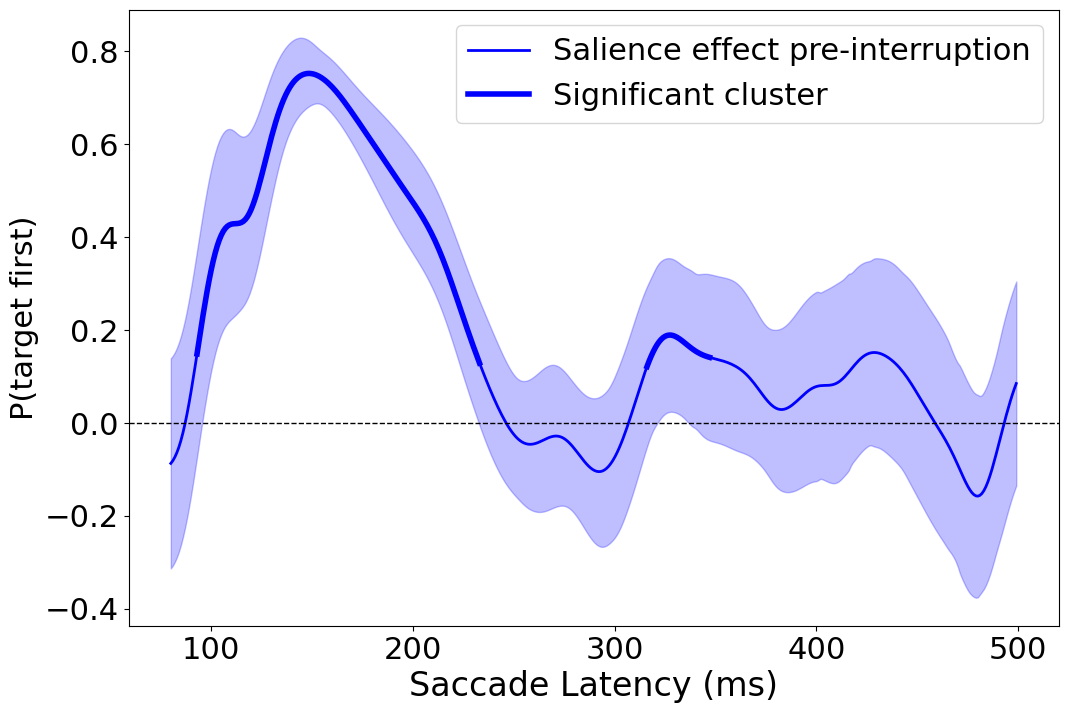

In [ ]:
# ==============================================================================
# Difference Plot with Red/Blue Bold Lines for Significant Clusters
# ==============================================================================

# Calculate the difference between smoothed averages
difference = pairedSamp1.weighDv2Average - pairedSamp1.weighDv1Average

# Calculate confidence intervals for the difference
# Standard error of the mean (SEM) across participants for the difference
sem_diff = sem(pairedSamp1.smooth_dv2 - pairedSamp1.smooth_dv1, axis=0)
# 95% confidence interval: mean ± 1.96 * SEM
diff_conf95 = 1.96 * sem_diff

# Create a new figure for the difference plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the difference line
ax.plot(pairedSamp1.timeVect, difference, color='blue', linewidth=2, label='Salience effect pre-interruption')
# Plot the difference line


# Plot the confidence intervals
ax.fill_between(pairedSamp1.timeVect, 
                difference - diff_conf95, 
                difference + diff_conf95, 
                color='blue', alpha=0.25)

# Highlight significant clusters with red or blue bold lines
for ind, cluster in enumerate(pairedSamp1.sigCL):
    # Use red if the mean difference is positive, blue if negative
    cluster_color = 'blue' 
    
    ax.plot(pairedSamp1.timeVect[cluster], difference[cluster], color=cluster_color, linewidth=4)

# Add a horizontal dashed line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

# Adjust plot settings
# ax.set_xlim([125, 325])  # Extra space before 120ms and after 300ms
# ax.set_ylim([-0.2, 1.0])  # Adjust based on your data
ax.set_xlabel('Saccade Latency (ms)', fontsize=24)
ax.set_ylabel('P(target first)', fontsize=22)
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)
# Add a legend
custom_lines = [
    plt.Line2D([0], [0], color='blue', linewidth=2, label='Salience effect pre-interruption'),
    plt.Line2D([0], [0], color='blue', linewidth=4, label='Significant cluster')
]
ax.legend(handles=custom_lines, loc='best', fontsize=22)
# Show the plot
plt.show()

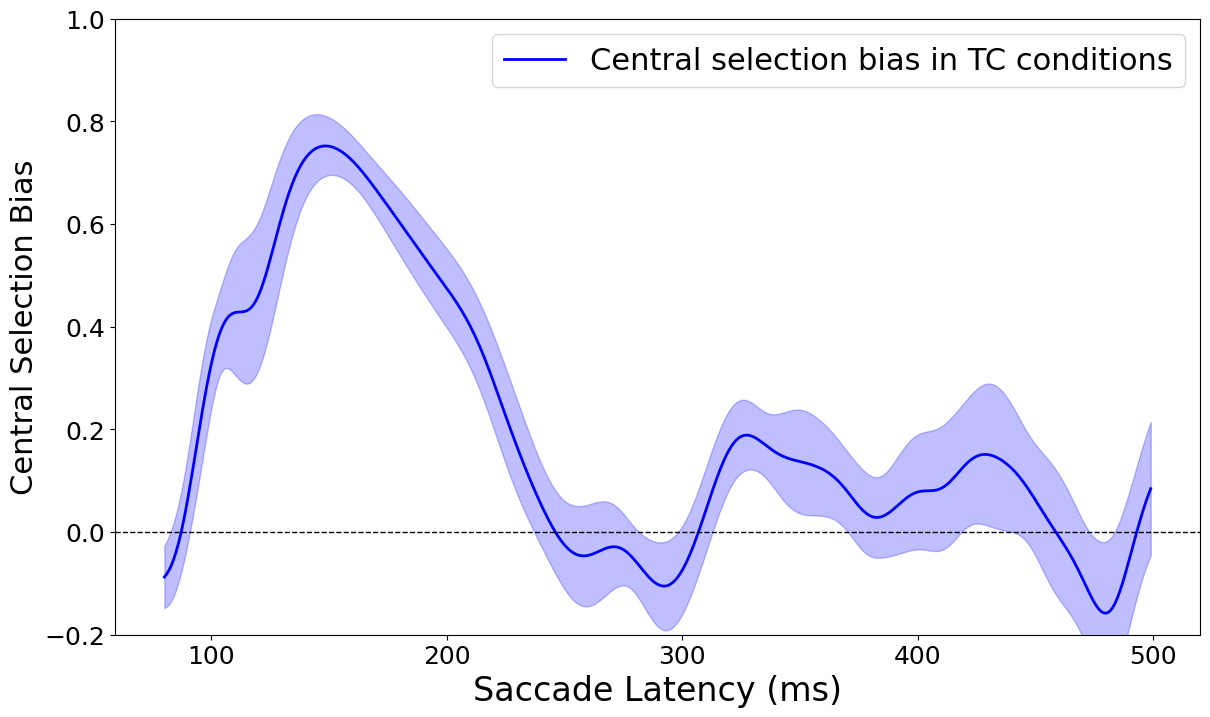

In [ ]:
# TODO what's the difference between this and plot above? just calculating 95%CI instead of SEM?
# ==============================================================================
# # Difference Plot 1: Blue - Red (StoUp_close_diff vs StoUp_close_same)
# ==============================================================================

# Calculate the first difference
difference1 = pairedSamp1.weighDv2Average - pairedSamp1.weighDv1Average
conf95_diff1 = np.sqrt(pairedSamp1.conf95**2 + pairedSamp1.conf95**2)

# Create a new figure for the first difference plot
fig1, ax1 = plt.subplots(figsize=(14, 8))#figsize=(10, 6)#)

ax1.plot(
    pairedSamp1.timeVect,
    difference1,
    color='blue',
    linewidth=2,
    label='Central selection bias in TC conditions'
)

ax1.fill_between(
    pairedSamp1.timeVect,
    difference1 - conf95_diff1,
    difference1 + conf95_diff1,
    color='blue',
    alpha=0.25
)

ax1.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax1.set_xlabel('Saccade Latency (ms)', fontsize=24)
ax1.set_ylabel('Central Selection Bias', fontsize=22)
ax1.set_ylim([-0.2, 1])

# Explicitly set the x-axis limit to give some space (110 to 310ms)
# ax1.set_xlim([125, 325])  # Extra space before 120ms and after 300ms

# Define the ticks at 20ms intervals between 120ms and 300ms
# ticks_avg = list(range(125, 326, 25))  # Generates ticks at 120, 140, 160, ..., 300
# ax1.set_xticks(ticks_avg)
ax1.tick_params(axis='x', labelsize=18)  # X-axis tick labels font size
ax1.tick_params(axis='y', labelsize=18)  # Y-axis tick labels font size

ax1.legend(loc='best', fontsize=22) #adjust the label
#ax1.set_title('Central Selection Bias (Difference 1: Top-close vs Close-same)')

plt.show()

Significant cluster from 80 to 262 ms, p < 0.050, tcluster (23) = 1690.37, dcluster = 345.04
Significant cluster from 334 to 387 ms, p < 0.050, tcluster (23) = 199.59, dcluster = 40.74
Significant cluster from 434 to 441 ms, p < 0.050, tcluster (23) = 17.09, dcluster = 3.49
Significant cluster from 453 to 462 ms, p < 0.050, tcluster (23) = 24.99, dcluster = 5.10
Significant cluster from 472 to 482 ms, p < 0.050, tcluster (23) = 26.24, dcluster = 5.36


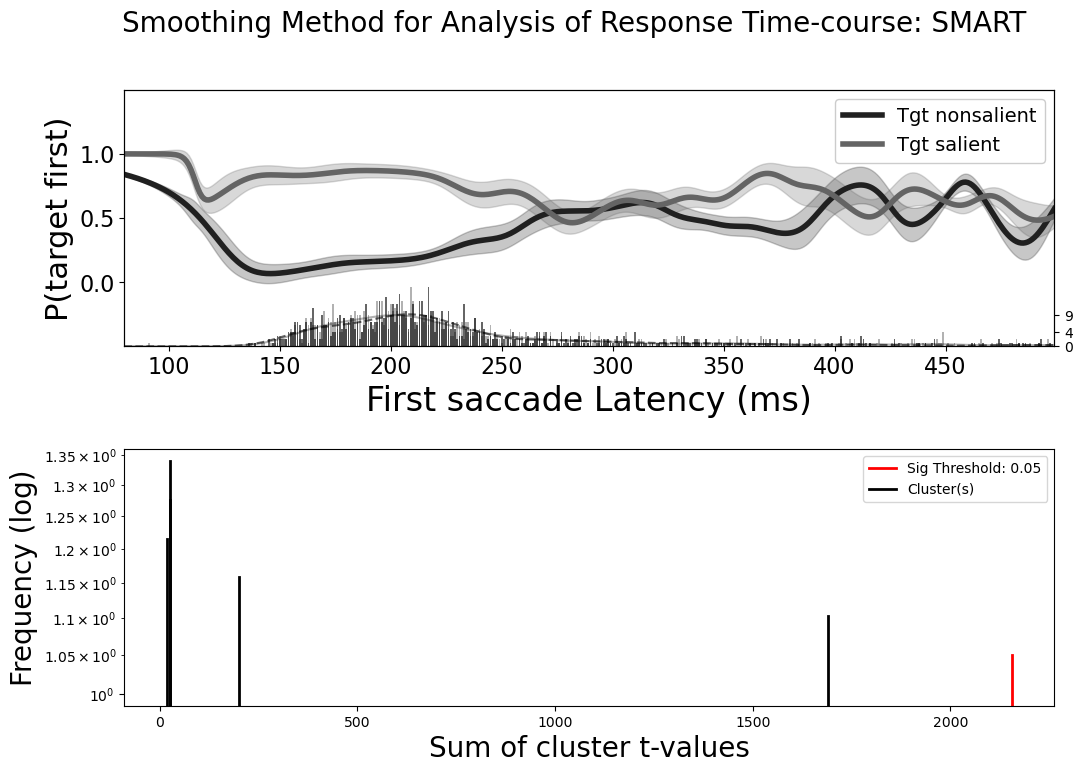

In [22]:
# ==============================================================================
# # Salience effect post interruption (tgt_first_ns_post vs tgt_first_s_post) - Blue - Red
# ==============================================================================

# Initialize and run SMART analysis
pairedSamp2 = SMART(fName, depVar3, timeVar3, depVar4, timeVar4)
pairedSamp2.runSmooth(krnSize, minTime, maxTime, stepTime)
pairedSamp2.runPermutations(nPerm)
pairedSamp2.runStats(sigLevel)

# Original plot for pairedSamp2
pairedSamp2.runPlot()
cf = plt.gcf()
cf.set_size_inches(12, 8)  # Increase figure size for clarity
pairedSamp2.ax1.legend(['Tgt nonsalient','Tgt salient'], prop={"size": 14}, loc=1, framealpha=1, fancybox=True)
pairedSamp2.ax1.set_xlabel('First saccade Latency (ms)', fontsize=24)
pairedSamp2.ax1.set_ylabel('P(target first)', size=22)

# Adjust tick font sizes for x and y axes
pairedSamp2.ax1.tick_params(axis='x', labelsize=16)  # Adjust x-axis tick font size
pairedSamp2.ax1.tick_params(axis='y', labelsize=16)  # Adjust y-axis tick font size
# pairedSamp2.ax1.set_ylim([-0.31, 1.51])
pairedSamp2.ax1.set_yticks([0, 0.5, 1.0]) # Set y-axis ticks to 0, 0.5, 1.0

plt.subplots_adjust(hspace=0.4)

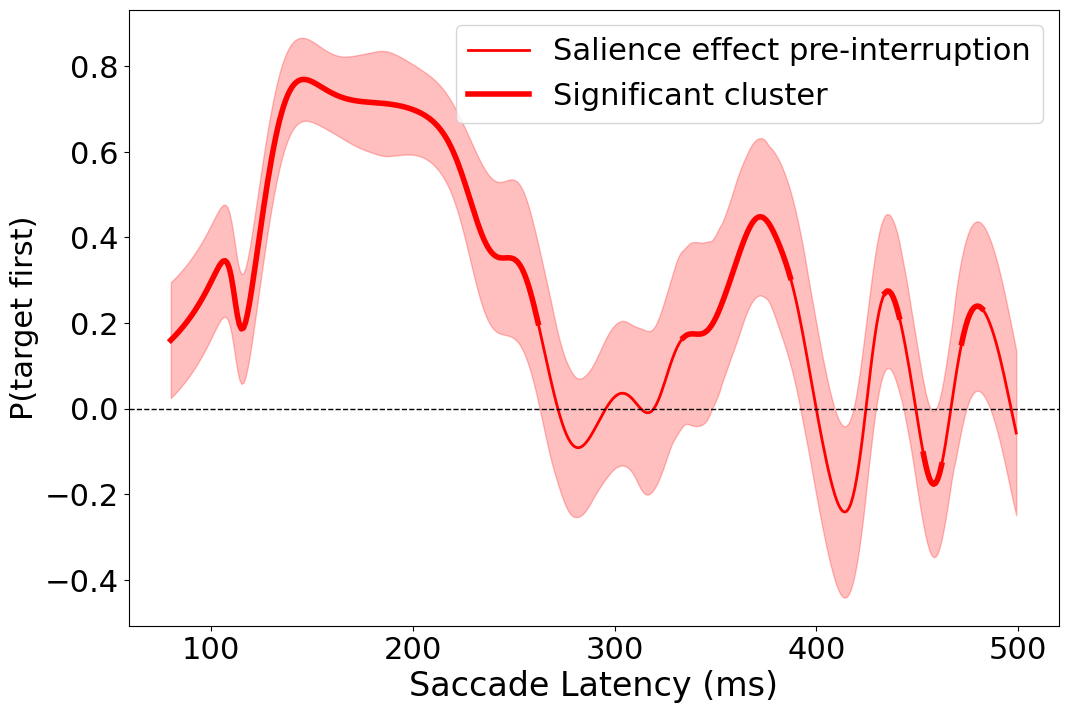

In [ ]:
# ==============================================================================
# Difference Plot 2: Red - Red (tgt_first_ns_post vs tgt_first_s_post)
# ==============================================================================

# Calculate the second difference
difference2 = pairedSamp2.weighDv2Average - pairedSamp2.weighDv1Average # TODO i switched the order of subtraction so that curve would be positive, is that ok?

# Calculate confidence intervals for the difference
sem_diff2 = sem(pairedSamp2.smooth_dv2 - pairedSamp2.smooth_dv1, axis=0)  # SEM for the difference TODO same switching of order here as above!
conf95_diff2 = 1.96 * sem_diff2  # 95% confidence interval

# Create a new figure for the second difference plot
fig2, ax2 = plt.subplots(figsize=(12, 8))

# Plot the difference line
ax2.plot(
    pairedSamp2.timeVect,
    difference2,
    color='red',
    linewidth=2,
    label='Salience effect pre-interruption')

# Plot the confidence intervals
ax2.fill_between(
    pairedSamp2.timeVect,
    difference2 - conf95_diff2,
    difference2 + conf95_diff2,
    color='red',
    alpha=0.25
)

# Highlight significant clusters with bold red lines
for ind, cluster in enumerate(pairedSamp2.sigCL):
    cluster_color = 'red'
    ax2.plot(pairedSamp2.timeVect[cluster], difference2[cluster], color=cluster_color, linewidth=4)

# Add a horizontal dashed line at y=0
ax2.axhline(0, color='black', linestyle='--', linewidth=1)

# Adjust plot settings
# ax2.set_xlim([125, 325])  # Set x-axis limits for consistency
# ax2.set_ylim([-0.2, 1.0])  # Adjust based on your data
ax2.set_xlabel('Saccade Latency (ms)', fontsize=24)
ax2.set_ylabel('P(target first)', fontsize=22)
ax2.tick_params(axis='x', labelsize=22)
ax2.tick_params(axis='y', labelsize=22)

# Add a legend
custom_lines = [
    plt.Line2D([0], [0], color='red', linewidth=2, label='Salience effect pre-interruption'),
    plt.Line2D([0], [0], color='red', linewidth=4, label='Significant cluster')
]
ax2.legend(handles=custom_lines, loc='best', fontsize=22)

# Show the plot
plt.show()

In [ ]:
# TODO i don't know what this is - no edits so far
# Identify significant clusters
significant_indices2 = np.where((difference2 - conf95_diff2) > 0)[0]
if significant_indices2.size > 0:
    significant_clusters2 = np.split(significant_indices2, np.where(np.diff(significant_indices2) != 1)[0] + 1)
    for cluster in significant_clusters2:
        start_time = pairedSamp2.timeVect[cluster[0]]
        end_time = pairedSamp2.timeVect[cluster[-1]]
        print(f"Significant cluster from {start_time} to {end_time} ms for difference2")
else:
    print("No significant clusters found for Upper Bias")


# Highlight significant clusters and print details
print("Significant Clusters Information for Difference Plot 2:")
for ind, cluster in enumerate(pairedSamp2.sigCL):
    cluster_time = pairedSamp2.timeVect[cluster]  # Time range for the current cluster
    t_value = pairedSamp2.sumTvals[ind]  # Sum of t-values for the cluster
    is_significant = t_value >= pairedSamp2.sigThres  # Check if the cluster is significant
    cluster_diff = difference2[cluster]  # Difference values for the cluster

    print(f"Cluster {ind + 1}:")
    print(f"  Time Range: {cluster_time[0]}ms to {cluster_time[-1]}ms")
    print(f"  Sum of T-Values: {t_value}")
    print(f"  Significant: {'Yes' if is_significant else 'No'}")
    print(f"  Difference Values: {cluster_diff}")

Significant cluster from 80.0 to 262.0 ms for difference2
Significant cluster from 349.0 to 391.0 ms for difference2
Significant cluster from 430.0 to 443.0 ms for difference2
Significant cluster from 475.0 to 486.0 ms for difference2
Significant Clusters Information for Difference Plot 2:
Cluster 1:
  Time Range: 80.0ms to 262.0ms
  Sum of T-Values: 1690.3663086287922
  Significant: No
  Difference Values: [0.16011111 0.16484312 0.16973593 0.17479768 0.18003712 0.18546367
 0.19108743 0.1969192  0.20297055 0.20925376 0.21578176 0.22256808
 0.22962659 0.23697108 0.2446147  0.25256881 0.2608413  0.26943385
 0.2783375  0.28752576 0.2969438  0.30649153 0.31599779 0.3251816
 0.33359644 0.34055559 0.34504658 0.34566819 0.34067737 0.32830904
 0.30755235 0.2793275  0.24737068 0.21766544 0.19615645 0.1863426
 0.18857864 0.20106874 0.22126978 0.24681115 0.27583549 0.30700194
 0.33936939 0.37227028 0.40521236 0.43781233 0.46975494 0.50076971
 0.53061918 0.55909396 0.58601175 0.61121834 0.63458925

In [ ]:
# ==============================================================================
# Average of the Two Difference Plots
# ==============================================================================

# Calculate the average of the two difference plots
average_difference = (difference + difference2) / 2

# Calculate pooled SEM and confidence intervals for the average
pooled_sem = np.sqrt(sem(pairedSamp1.smooth_dv2 - pairedSamp1.smooth_dv1, axis=0)**2 +
                     sem(pairedSamp2.smooth_dv2 - pairedSamp2.smooth_dv1, axis=0)**2) / 2 # TODO again inverted order of subtraction
average_conf95 = 1.96 * pooled_sem

# Identify areas where the average difference is significantly greater than 0
significant_indices = np.where((average_difference - average_conf95) > 0)[0]
if len(significant_indices) > 0:
    significant_start = pairedSamp1.timeVect[significant_indices[0]]
    significant_end = pairedSamp1.timeVect[significant_indices[-1]]
    # Calculate t-cluster as the sum of t-values
    t_cluster = np.sum((average_difference / pooled_sem)[significant_indices])
    # Calculate effect size (d-cluster)
    d_cluster = t_cluster / np.sqrt(len(pairedSamp1.smooth_dv1))
    # Estimate p-value (using permutation distribution, for example)
    # Assuming pairedSamp1.permDistr contains permutation distribution of t-cluster
    p_value = np.mean(pairedSamp1.permDistr >= t_cluster)
    # Print the significant time window and statistics
    print(f"Significant time window: {significant_start:.0f} ms to {significant_end:.0f} ms")
    print(f"p-value: {p_value:.3f}")
    print(f"t-cluster: {t_cluster:.2f}")
    print(f"d-cluster: {d_cluster:.2f}")
else:
    print("No significant time window found.")

Significant time window: 90 ms to 443 ms
p-value: 0.000
t-cluster: 2374.59
d-cluster: 407.24


Significant cluster from 89.0 to 253.0 ms
Significant cluster from 328.0 to 341.0 ms
Significant cluster from 346.0 to 388.0 ms
Significant cluster from 430.0 to 442.0 ms


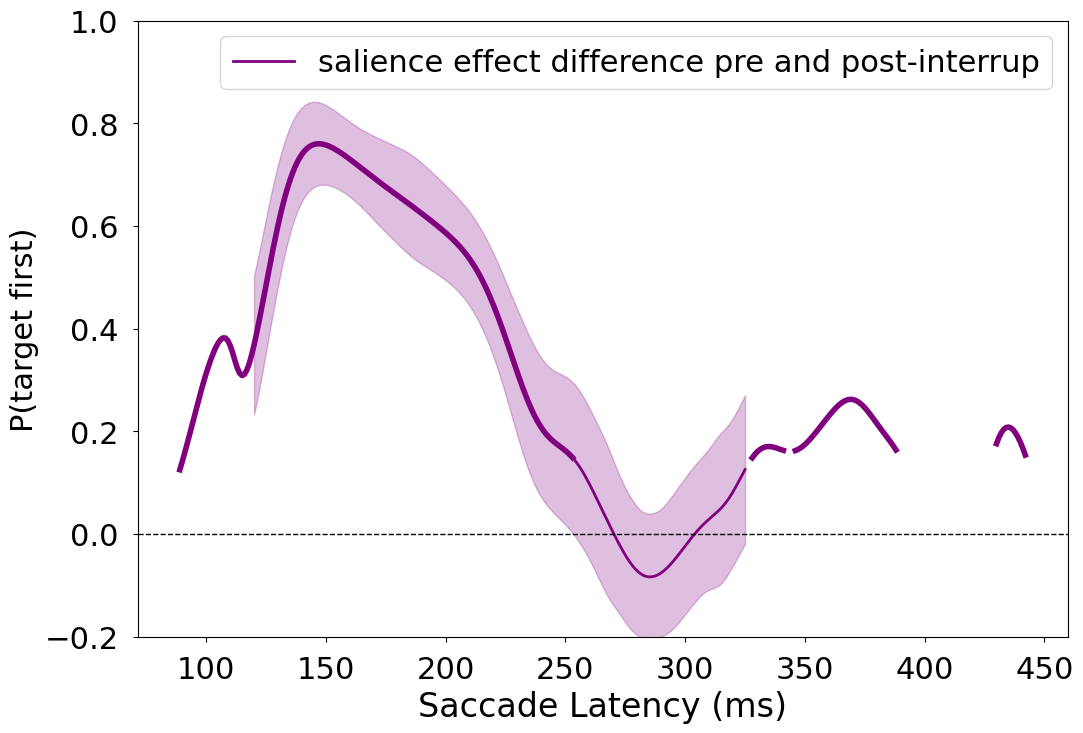

In [37]:
# ==============================================================================
# Averaged Difference Plot with Red/Blue Bold Lines for Significant Clusters
# ==============================================================================

# Compute the averaged difference
average_difference = (difference1 + difference2) / 2
conf95_avg_diff = np.sqrt((conf95_diff1**2 + conf95_diff2**2) / 2)

# Identify significant time windows
significant_indices = np.where((average_difference - conf95_avg_diff) > 0)[0]
significant_clusters = []
if significant_indices.size > 0:
    significant_clusters = np.split(significant_indices, np.where(np.diff(significant_indices) != 1)[0] + 1)
    for cluster in significant_clusters:
        start_time = pairedSamp1.timeVect[cluster[0]]
        end_time = pairedSamp1.timeVect[cluster[-1]]
        print(f"Significant cluster from {start_time:.1f} to {end_time:.1f} ms")
else:
    print("No significant clusters found")

# Clip the data to the desired x-axis range (120 to 300 ms)
valid_indices_avg = (pairedSamp1.timeVect >= 120) & (pairedSamp1.timeVect <= 325) # TODO maybe i don't need this clipping? the weird segmentation in the plot is from here i think
timeVect_avg_clipped = pairedSamp1.timeVect[valid_indices_avg]
average_difference_clipped = average_difference[valid_indices_avg]
conf95_avg_diff_clipped = conf95_avg_diff[valid_indices_avg]

# Create a new figure for the averaged difference plot
fig3, ax3 = plt.subplots(figsize=(12, 8))

# Plot the averaged difference line (with clipped data)
ax3.plot(timeVect_avg_clipped, average_difference_clipped, color='purple', linewidth=2, label='Overall central selection bias')

# Plot the confidence intervals for the averaged difference (with clipped data)
ax3.fill_between(
    timeVect_avg_clipped,
    average_difference_clipped - conf95_avg_diff_clipped,
    average_difference_clipped + conf95_avg_diff_clipped,
    color='purple',
    alpha=0.25
)

# Highlight significant clusters with red or blue bold lines
for cluster in significant_clusters:
    # Determine the color based on the mean difference in the cluster
    cluster_color = 'purple'
    start_time = pairedSamp1.timeVect[cluster[0]]
    end_time = pairedSamp1.timeVect[cluster[-1]]
    cluster_indices = (pairedSamp1.timeVect >= start_time) & (pairedSamp1.timeVect <= end_time)
    ax3.plot(
        pairedSamp1.timeVect[cluster_indices],
        average_difference[cluster_indices],
        color=cluster_color,
        linewidth=4
    )

# Add a horizontal line at y=0
ax3.axhline(y=0, color='k', linestyle='--', linewidth=1)

# Add labels
ax3.set_xlabel('Saccade Latency (ms)', fontsize=24)
ax3.set_ylabel('P(target first)', fontsize=22)
ax3.set_ylim([-0.2, 1])

# Explicitly set the x-axis limit to give some space (110 to 310ms)
# ax3.set_xlim([125, 325])  # Extra space before 120ms and after 300ms

# Define the ticks at 20ms intervals between 120ms and 300ms
# ticks_avg = list(range(125, 326, 25))  # Generates ticks at 120, 140, 160, ..., 300
# ax3.set_xticks(ticks_avg)
ax3.tick_params(axis='x', labelsize=22, pad=10)  # X-axis tick labels font size
ax3.tick_params(axis='y', labelsize=22, pad=10)  # Y-axis tick labels font size

# Add a legend
custom_lines = [
    plt.Line2D([0], [0], color='purple', linewidth=2, label='salience effect difference pre and post-interrup'),
    #plt.Line2D([0], [0], color='purple', linewidth=4, label='Significant cluster')
]
ax3.legend(handles=custom_lines, loc='best', fontsize=22)

# Show the plot
plt.show()

In [38]:
####### identify the precentage of the trials in specific time window #######
def calculate_proportion_within_window_per_participant(data, timeVar, minTime, maxTime, condition_name):
    # Extract the column of time data
    time_data = data[timeVar]
    
    # Initialize variables
    total_trials = 0
    total_within_window = 0
    participant_proportions = []
    
    # Loop through each participant
    for participant_times in time_data:
        participant_times = np.array(participant_times)  # Ensure data is a numpy array
        within_window = (participant_times >= minTime) & (participant_times <= maxTime)
        
        # Count trials for this participant
        num_trials = len(participant_times)
        num_within_window = np.sum(within_window)
        
        # Update totals
        total_trials += num_trials
        total_within_window += num_within_window
        
        # Record proportion for this participant
        if num_trials > 0:
            participant_proportions.append(num_within_window / num_trials)
    
    # Calculate overall and average proportions
    overall_proportion = total_within_window / total_trials if total_trials > 0 else 0
    avg_participant_proportion = np.mean(participant_proportions) if participant_proportions else 0
    
    # Print results
    print(f"Condition: {condition_name}")
    print(f"Total trials across all participants: {total_trials}")
    print(f"Trials within [{minTime}, {maxTime}] ms: {total_within_window}")
    print(f"Overall proportion of trials within window: {overall_proportion:.2%}")
    print(f"Average proportion per participant: {avg_participant_proportion:.2%}")
    print("-" * 40)
    return overall_proportion, avg_participant_proportion

data = pd.read_pickle(fName)  # Load the pickle file into a DataFrame
overall_prop1, avg_participant_prop1 = calculate_proportion_within_window_per_participant(data, timeVar1, minTime, maxTime, depVar1)
overall_prop2, avg_participant_prop2 = calculate_proportion_within_window_per_participant(data, timeVar2, minTime, maxTime, depVar2)


Condition: tgt_first_ns_pre
Total trials across all participants: 5183
Trials within [80, 500] ms: 5057
Overall proportion of trials within window: 97.57%
Average proportion per participant: 97.52%
----------------------------------------
Condition: tgt_first_s_pre
Total trials across all participants: 5123
Trials within [80, 500] ms: 5005
Overall proportion of trials within window: 97.70%
Average proportion per participant: 97.72%
----------------------------------------


In [41]:
############ identify the time window contain 98%of the trials #######

def identify_middle_98(data, timeVar):
    """
    Identifies the middle 98% of trials based on saccade latency.
    Args:
        data (pd.DataFrame): DataFrame containing the saccade latencies.
        timeVar (str): Column name for the saccade latency data (lists or arrays).
    Returns:
        (float, float): The 2nd and 98th percentiles of the saccade latencies.
    """
    # Flatten the list of saccade latencies across all participants
    all_times = np.concatenate(data[timeVar].values)
    
    # Compute the 2nd and 98th percentiles
    lower_bound = np.percentile(all_times, 2)
    upper_bound = np.percentile(all_times, 95)
    
    print(f"The middle 95% of trials fall between {lower_bound:.2f} ms and {upper_bound:.2f} ms.")
    return lower_bound, upper_bound

# Example usage
timeVar1 = 'sacc_lat_ns_pre'  # Replace with your column name
lower, upper = identify_middle_98(data, timeVar1)

The middle 95% of trials fall between 144.00 ms and 413.00 ms.


In [42]:
# Identify significant clusters and print formatted results
def print_significant_clusters(paired_sample, difference, conf95_diff, time_vect, sig_level=0.001, df=19):
    significant_indices = np.where((difference - conf95_diff) > 0)[0]
    if significant_indices.size > 0:
        # Identify clusters
        significant_clusters = np.split(significant_indices, np.where(np.diff(significant_indices) != 1)[0] + 1)
        for cluster in significant_clusters:
            start_time = time_vect[cluster[0]]
            end_time = time_vect[cluster[-1]]
            
            # Calculate cluster-level statistics
            cluster_diff = difference[cluster]
            tcluster = np.sum(cluster_diff)  # Sum of t-values
            dcluster = tcluster / np.sqrt(df + 1)  # Estimate of cluster-level effect size
            
            # Print in the required format
            print(f"{start_time:.0f}-{end_time:.0f} ms, p < {sig_level:.3f}, tcluster ({df}) = {tcluster:.2f}, dcluster = {dcluster:.2f}")
    else:
        print("No significant clusters found.")

# Example usage for difference1 (Central Selection Bias: Close-diff vs Close-same)
print_significant_clusters(
    paired_sample=pairedSamp1,
    difference=difference1,
    conf95_diff=conf95_diff1,
    time_vect=pairedSamp1.timeVect,
    sig_level=0.01,  # significance level
    df=23  # degrees of freedom
)

91-237 ms, p < 0.010, tcluster (23) = 72.44, dcluster = 14.79
313-370 ms, p < 0.010, tcluster (23) = 8.26, dcluster = 1.69
419-440 ms, p < 0.010, tcluster (23) = 3.10, dcluster = 0.63


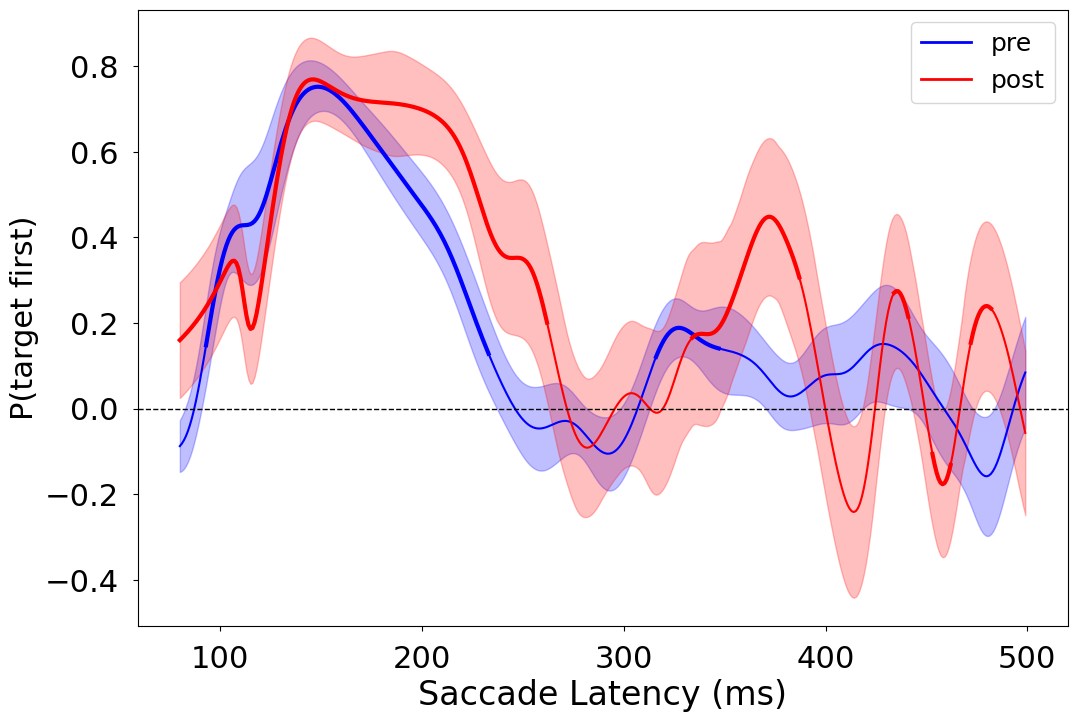

In [46]:
# Create a new figure for the combined plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the first difference (Blue line for TC conditions)
ax.plot(
    pairedSamp1.timeVect,
    difference1,
    color='blue',
    linewidth=1.5,
    label='Central selection bias in TC conditions'
)

# Plot the first confidence interval (Blue shaded area)
ax.fill_between(
    pairedSamp1.timeVect, 
    difference1 - conf95_diff1, 
    difference1 + conf95_diff1, 
    color='blue', 
    alpha=0.25
)

# Plot the second difference (Red line for TF conditions)
ax.plot(
    pairedSamp2.timeVect,
    difference2,
    color='red',
    linewidth=1.5,
    label='Central selection bias in TF conditions'
)

# Plot the second confidence interval (Red shaded area)
ax.fill_between(
    pairedSamp2.timeVect, 
    difference2 - conf95_diff2, 
    difference2 + conf95_diff2, 
    color='red', 
    alpha=0.25
)

# Highlight significant clusters for `difference1` (Blue bold lines)
for ind, cluster in enumerate(pairedSamp1.sigCL):
    ax.plot(pairedSamp1.timeVect[cluster], difference1[cluster], color='blue', linewidth=3)

# Highlight significant clusters for `difference2` (Red bold lines)
for ind, cluster in enumerate(pairedSamp2.sigCL):
    ax.plot(pairedSamp2.timeVect[cluster], difference2[cluster], color='red', linewidth=3)

# Add a horizontal dashed line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

# Adjust plot settings
# ax.set_xlim([125, 325])  # Extra space before 120ms and after 300ms
# ax.set_ylim([-0.2, 1.0])  # Adjust based on your data
ax.set_xlabel('Saccade Latency (ms)', fontsize=24)
ax.set_ylabel('P(target first)', fontsize=22)
ax.tick_params(axis='x', labelsize=22, pad=10)
ax.tick_params(axis='y', labelsize=22, pad=10)

# Add a legend
custom_lines = [
    plt.Line2D([0], [0], color='blue', linewidth=2, label='pre'),
    plt.Line2D([0], [0], color='red', linewidth=2, label='post'),
]
ax.legend(handles=custom_lines, loc='best', fontsize=18)

# Show the plot
plt.show()